In [7]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import random
import math
from sklearn.datasets import load_iris

In [93]:
class KMeansClusterer:
    def __init__(self):
        pass
    
    def _euclidean_distance(self, x, y):
        return math.sqrt(np.sum((x - y) ** 2))
        
        
    def fit(self, X):
        self.X = X;
        
    def train(self, k, max_iters = 100):
        self.k = k;
        self.centroids = np.array(self.X[random.sample(range(self.X.shape[0]), self.k)])
        self.centers = {cluster_ind : [] for cluster_ind in range(self.k)}
        
        for iteration in range(max_iters):
            self.centers = {cluster_ind : [] for cluster_ind in range(self.k)}
            for ind, x in enumerate(self.X):
                distances = [self._euclidean_distance(x, centroid) for centroid in self.centroids]
                self.centers[np.argmin(distances)].append(x)
                
            centroids = np.array([np.mean(self.centers[cluster_ind], axis = 0) for cluster_ind in range(self.k)])
            if np.all(centroids == self.centroids):
                break
                
            self.centroids = centroids
            
            
            
    def plot(self):
        
        generate_color = lambda : f"#{''.join(random.sample(list('abcdef0123456789'), 6))}"
        
        for cluster_ind in range(self.k):
            color = generate_color()
            self.centers[cluster_ind] = np.array(self.centers[cluster_ind])
            plt.scatter(x = self.centers[cluster_ind][:, 0], y = self.centers[cluster_ind][:, 1], color = color)

        color = generate_color()
        for centroid in self.centroids:
            plt.scatter(x = centroid[0], y = centroid[1], color = color)
            
        plt.show();
        
                

In [24]:
data = load_iris()['data']

In [94]:
model = KMeansClusterer()
model.fit(data)

In [95]:
model.train(3, max_iters = 30)

In [96]:
model.centroids

array([[5.88360656, 2.74098361, 4.38852459, 1.43442623],
       [5.006     , 3.428     , 1.462     , 0.246     ],
       [6.85384615, 3.07692308, 5.71538462, 2.05384615]])

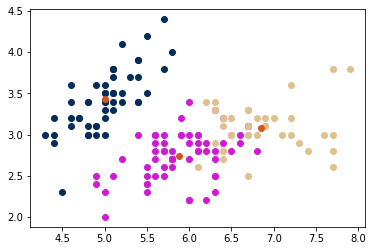

In [101]:
model.plot()